In [24]:
import pandas as pd
import numpy as np

In [25]:
file_data = pd.read_csv("football_data.csv",encoding='latin1')
file_data.shape

(18207, 89)

In [26]:
# removing rows with wrong placement of data and empty entries
indexes = []
for index,rows in file_data.iterrows():
  if rows['Club Logo'][:5] != 'https' or rows['LS'] != rows['LS']:
    indexes.append(index)
print(len(indexes))
file_data.drop(file_data.index[indexes],inplace=True)
file_data.reset_index(drop=True, inplace=True)
file_data_copy = file_data
# print(file_data)
# file_data.shape

2085


In [27]:
#select columns which are useful numerical values
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
useful = ['Name','Age','Overall','Potential','Value','Wage','Special','International Reputation','Skill Moves',
          'Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
          'FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance',
          'ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
          'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling',
          'GKKicking','GKPositioning','GKReflexes']
useful.extend(positions)
# print(positions)
file_data = file_data[useful]

In [28]:
import re
def modifyValue(val):
  if val != val:
    return 0
  if type(val) == str:
    val = re.sub('[^A-Z0-9\.]', '', val)
    # val = val[7:]
    last = val[-1]
    if last not in ['K','M']:
      return 0
    val = val[:-1]
    val = float(val)
    val *=1000
    if last == 'M':
      val *= 1000
    return val
  return val 

file_data['Value'] = file_data['Value'].apply(modifyValue)
# print(file_data['Value']) 
file_data['Wage'] = file_data['Wage'].apply(modifyValue)  
# print(file_data['Wage'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
def modifyHeight(val):
  # print(val)
  val = val.split('\'')
  val = float(val[0])*12 + float(val[1])
  return val

file_data['Height'] = file_data['Height'].apply(modifyHeight)
# print(file_data['Height']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
def modifyWeight(weight):
  if type(weight) == str:
    weight = weight.replace('lbs','')
    return float(weight)

file_data['Weight'] = file_data['Weight'].apply(modifyWeight)
# print(file_data['Weight'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
def position(val):
  # print(val)
  val = val.split('+')
  val = float(val[0]) + float(val[1])
  return val

for pos in positions:
  file_data[pos] = file_data[pos].apply(position)
# print(file_data['LS']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
from sklearn.preprocessing import StandardScaler
file_data = file_data[['Finishing', 'Value']]
X = file_data.values
X = StandardScaler().fit_transform(X)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

X = StandardScaler().fit_transform(principalDf)

In [34]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [35]:
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [36]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit_predict(X)
labels = model.labels_
# print(max(labels))
name = file_data_copy['Name']
# print(name)
value = file_data_copy['Value']
finish = file_data_copy['Finishing']
for i in range(20):
    print(labels[i],name[i],value[i],finish[i])

1 L. Messi â¬110.5M 95.0
1 Cristiano Ronaldo â¬77M 94.0
1 Neymar Jr â¬118.5M 87.0
1 K. De Bruyne â¬102M 82.0
1 E. Hazard â¬93M 84.0
1 L. ModriÄ â¬67M 72.0
1 L. SuÃ¡rez â¬80M 93.0
1 Sergio Ramos â¬51M 60.0
1 R. Lewandowski â¬77M 91.0
1 T. Kroos â¬76.5M 76.0
1 D. GodÃ­n â¬44M 42.0
1 David Silva â¬60M 76.0
1 N. KantÃ© â¬63M 65.0
1 P. Dybala â¬89M 84.0
1 H. Kane â¬83.5M 94.0
1 A. Griezmann â¬78M 90.0
1 Sergio Busquets â¬51.5M 67.0
1 E. Cavani â¬60M 89.0
1 S. AgÃ¼ero â¬64.5M 93.0
1 G. Chiellini â¬27M 33.0


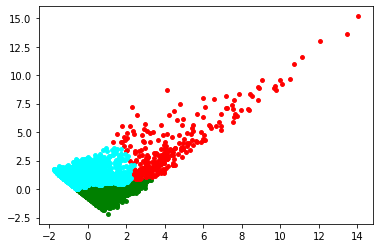

In [41]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=15, marker='o', color='green')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=15, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=15, marker='o', color='cyan')
plt.show()